In [3]:
# dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# datetime and time
import time
from datetime import datetime

# import vader sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# twitter API keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [4]:
# tweepy API authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# create sentiments list
sentiments = []

# target twitter users: BBC, CBS, CNN, Fox, NYT
target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

# put for loop
for user in target_users:

    counter = 0

    public_tweets = api.user_timeline(user, count=100)

    # loop through all tweets
    for tweet in public_tweets:

        # run Vader analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        # add sentiments for each tweet to the sentiments list
        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})

        # add counter
        counter = counter + 1

In [6]:
# pandas dataframe
newsmoods = pd.DataFrame.from_dict(sentiments)
newsmoods

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.0000,Sun Mar 18 20:30:11 +0000 2018,0.000,1.000,0.000,"🏃💪 @LesDennis, @SimplySusannah, @Tameka_Empson...",0,@BBC
1,0.0258,Sun Mar 18 20:03:04 +0000 2018,0.086,0.824,0.090,👎💌 Fans of K-Pop boyband member @IBGDRGN have ...,1,@BBC
2,0.5994,Sun Mar 18 19:33:04 +0000 2018,0.000,0.803,0.197,"Saoirse Ronan stars as Eilis, a young girl who...",2,@BBC
3,-0.5994,Sun Mar 18 18:44:02 +0000 2018,0.163,0.837,0.000,Ruth Ellis was only 28 when she became the las...,3,@BBC
4,0.2040,Sun Mar 18 18:34:14 +0000 2018,0.077,0.772,0.151,RT @BBC_TopGear: 840bhp goes a little like thi...,4,@BBC
5,0.7331,Sun Mar 18 17:18:12 +0000 2018,0.000,0.660,0.340,"RT @bbcthree: Be honest, do you think you'll b...",5,@BBC
6,0.0000,Sun Mar 18 17:04:03 +0000 2018,0.000,1.000,0.000,🍎🗑 How much food do you throw away? If you're ...,6,@BBC
7,0.0000,Sun Mar 18 16:33:17 +0000 2018,0.000,1.000,0.000,❤️️📸Zun Lee wants his photography to give a ba...,7,@BBC
8,0.0000,Sun Mar 18 15:41:04 +0000 2018,0.000,1.000,0.000,🤰 A doctor explains why you can get pregnant a...,8,@BBC
9,0.0772,Sun Mar 18 14:33:07 +0000 2018,0.000,0.947,0.053,RT @BBCEngland: A number of runners have held ...,9,@BBC


In [7]:
# create analysis date
analysis_date = datetime.now().date()

# export to csv
newsmoods.to_csv("Twitter_News_Mood.csv", index=False)

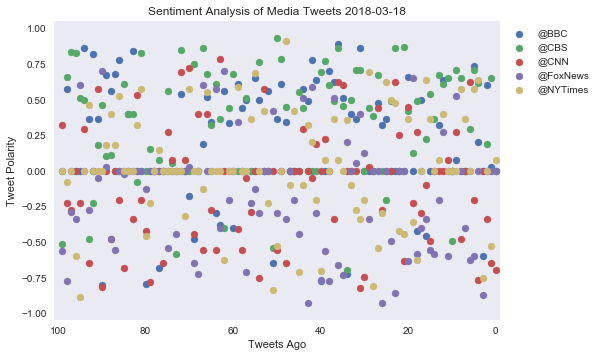

In [8]:
# plot scatter plot and x limit
plt.xlim(101, -1)

# use for loop
for user in target_users:
    dataframe = newsmoods.loc[newsmoods["User"] == user]
    plt.scatter(dataframe["Tweets Ago"], dataframe["Compound"], label=user)
    
# legend
plt.legend(bbox_to_anchor = (1,1))

# title, x axis label, y axis label.
plt.title(f"Sentiment Analysis of Media Tweets {analysis_date}")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

# grid plot
plt.grid()

plt.savefig(f"newsmoods_tweepy_api_plot.png")
plt.show()

In [9]:
# get average sentiment using groupby
average_sentiment = newsmoods.groupby("User")["Compound"].mean()
average_sentiment

User
@BBC        0.180383
@CBS        0.304366
@CNN       -0.074689
@FoxNews   -0.150219
@NYTimes    0.026051
Name: Compound, dtype: float64

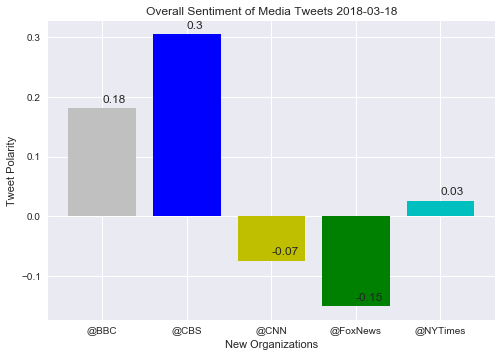

In [10]:
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0

for sentiment in average_sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1

plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['silver', 'b', 'y', 'g', 'c'])

# title, x axis label, and y axis label
plt.title(f"Overall Sentiment of Media Tweets {analysis_date}")
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig(f"newsmoods_tweepy_api_bar.png")
plt.show()